Las distintas columnas que aparecen corresponden a: 
* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **Salary**: a predecir

# 1. Preparación de Datos

In [2]:
# Librerias
import numpy as np  # Trabajar con matrices
import pandas as pd # Trabajar con ccsv, tablas, como si fueran SQL

import matplotlib.pyplot as plt # para visualizaciones
import seaborn as sns           # visualizaciones más elegantes.

import scipy.stats as stats     # Calculos estadisticos que no proporciona numpy

In [3]:
names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
        'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

In [4]:
# Carga el dataset
dataset_mat = pd.read_csv('adult.data.txt', header = None) # Carga el archivo en un dataframe
dataset_test = pd.read_csv('adult.test.txt', header = None, skiprows = 1) # Carga el archivo en un dataframe
dataset_mat.columns = names
dataset_test.columns = names

# Visualizar el contenido de los datos
dataset_mat.head() #muestra las 5 primeras lineas datos

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset_mat.info() # Estructura

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
dataset_test.info() # Estructura

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Text(0.5, 1.0, 'Distribución por Salario')

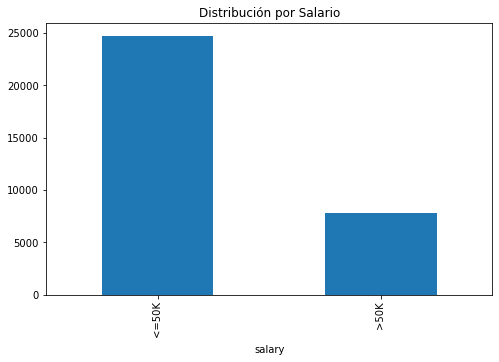

In [7]:
fig = plt.figure(figsize =  (8,5))
GrupoSalario = dataset_mat.groupby(['salary']).size()
GrupoSalario.plot.bar()
plt.title("Distribución por Salario")

Text(0.5, 1.0, 'Distribución por edad')

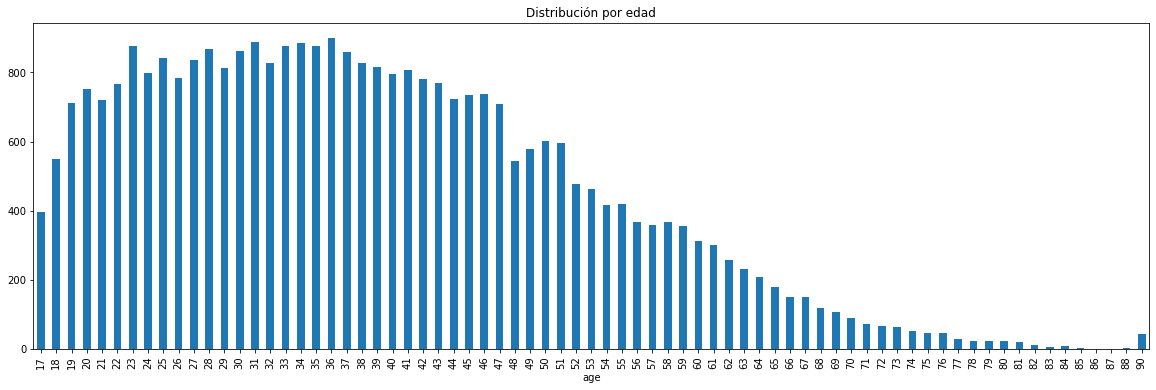

In [8]:
fig = plt.figure(figsize = (20,6))
GrupoEdad = dataset_mat.groupby(['age']).size()
GrupoEdad.plot.bar()
plt.title("Distribución por edad")

In [9]:
#dataset_mat.groupby(["age","salary"]).size().unstack(fill_value=0).reset_index()
dataset_mat.groupby(["age","salary"]).size().unstack(level=-1).reset_index()

salary,age,<=50K,>50K
0,17,395.0,NaN
1,18,550.0,NaN
2,19,710.0,2.0
3,20,753.0,NaN
4,21,717.0,3.0
...,...,...,...
68,85,3.0,NaN
69,86,1.0,NaN
70,87,1.0,NaN
71,88,3.0,NaN


La característica de edad describe la edad del individuo. Primero se muestra la distribución de edad de nuestro conjunto de datos. Las edades oscilan entre los 17 y los 90 años de edad, con la mayoría de las entradas entre las edades de 25 y 50 años. 
Al observar el gráfico anterior, se aprecia una significativa varianza entre la relación de >50k a <=50k entre las edades.
Los ratios más interesantes son los de las edades entre 17 y 20, entre 71 y 80, y 81 y 90, donde casi no se notan ingresos superior a $50.000. La proporción de entradas etiquetadas >50k a <=50k para las edades entre 21 y 30, 31 y 40, 41 y 50 y 51 y 60 también varían significativamente.

La característica education describe el nivel de educación de cada individuo en el conjunto de datos. El gráfico muestra la distribución de los diferentes niveles de educación. El grupo Other representa hasta el grado 12th. La mayoría tienen como mucho educación secundaria, mientras que sólo una pequeña parte tiene un doctorado.
Tambien se aprecia la relación entre niveles altos de educación y el número de personas etiquetadas >50k y <=50k. En su mayoría  un nivel alto de educación se correlaciona con un mayor porcentaje de individuos con la etiqueta >50k. Una referencia interesante es la proporción de individuos etiquetados >50k a <=50k, es casi la misma entre los que tienen un doctorado y los que fueron a una escuela profesional (Profschool)

El gráfico anterior muestra que la mayoría de personas trabajan en el sector privado. Hay un etiqueta con un número de individuos con una clase de trabajo desconocida.

Como se observa en el gráfico, hay una distribución algo uniforme de las ocupaciones en el conjunto de datos, sin tener en cuenta la ausencia de las armed-forces. Sin embargo, exec-gerencial y prof-specialty destacan por tener porcentajes muy altos de individuos que superan los $50.000. Además, los porcentajes para la farming-fishing, otherservice y Handlers-cleaners son significativamente más bajos que el resto de la distribución.

In [10]:
dataset_mat_stats_df = dataset_mat.describe().T
dataset_mat_stats_df

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# Grafica features categóricas

In [11]:
num_features_index = dataset_mat_stats_df.index

In [12]:
num_features_index, dataset_mat.columns

(Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'),
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'salary'],
       dtype='object'))

In [13]:
# Carga en una lista las variables categoricas
cat_features_list = [col for col in dataset_mat.columns if col not in num_features_index]
cat_features_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

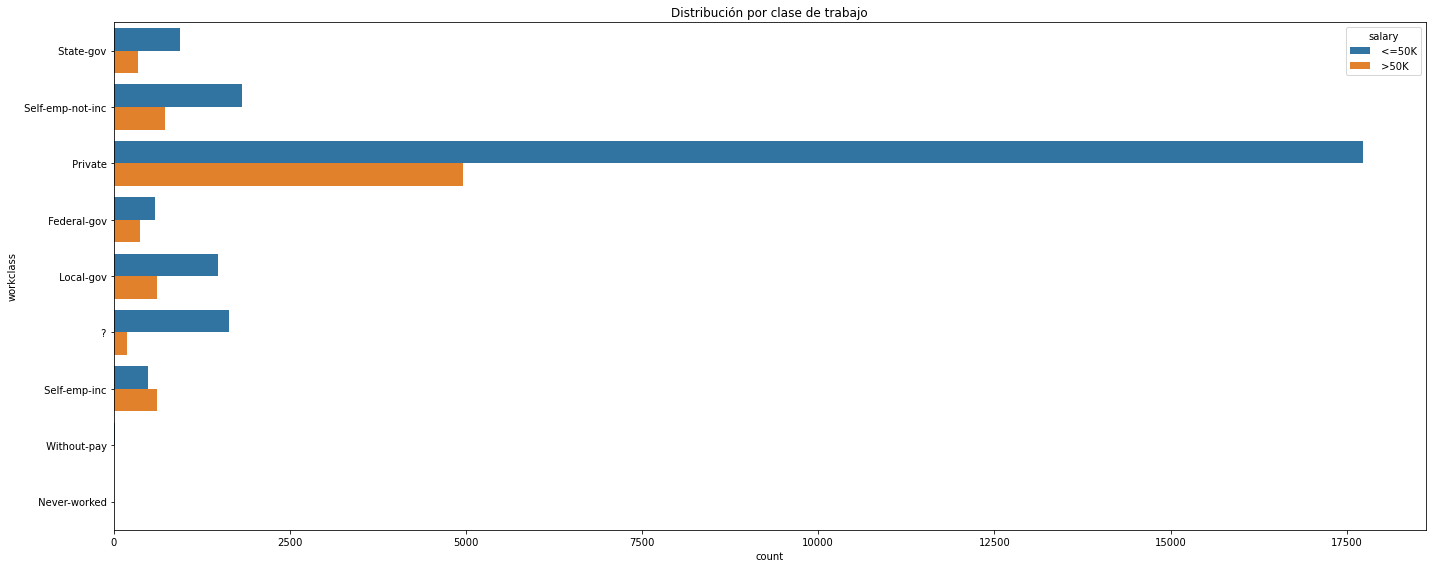

In [14]:
fig = plt.figure(figsize =  (20,8))
sns.countplot(y='workclass', hue = 'salary', data = dataset_mat, )
plt.title("Distribución por clase de trabajo")
plt.tight_layout()

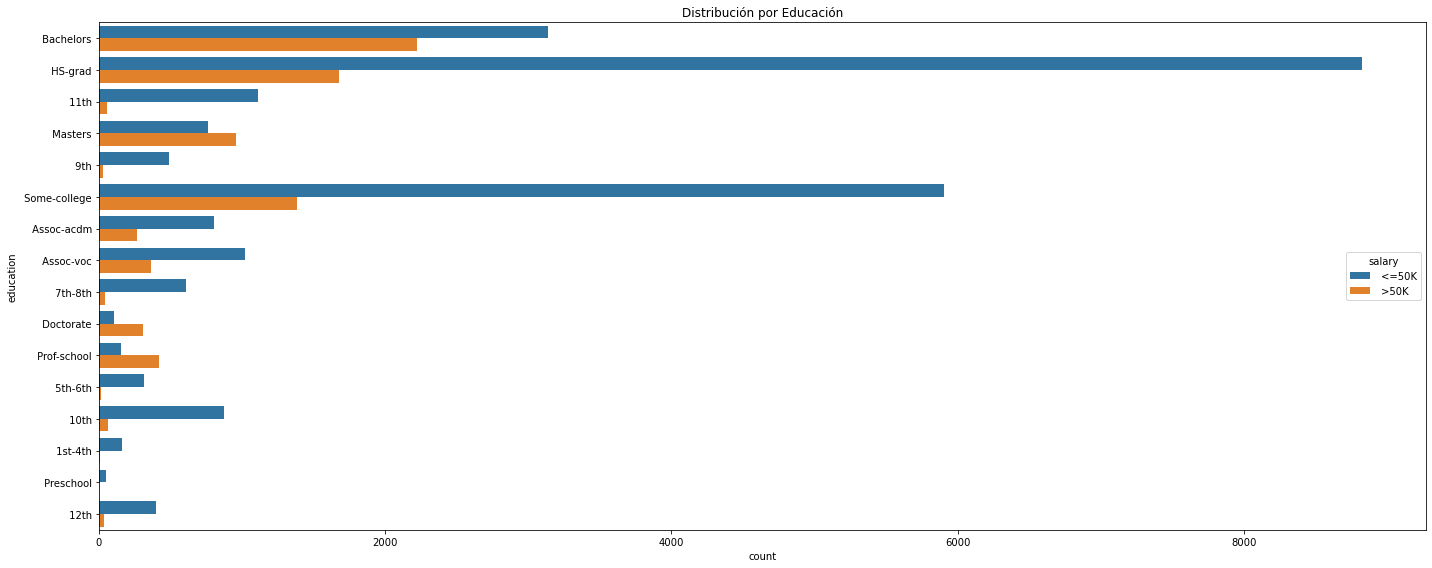

In [15]:
fig = plt.figure(figsize =  (20,8))
sns.countplot(y='education', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Educación")
plt.tight_layout()

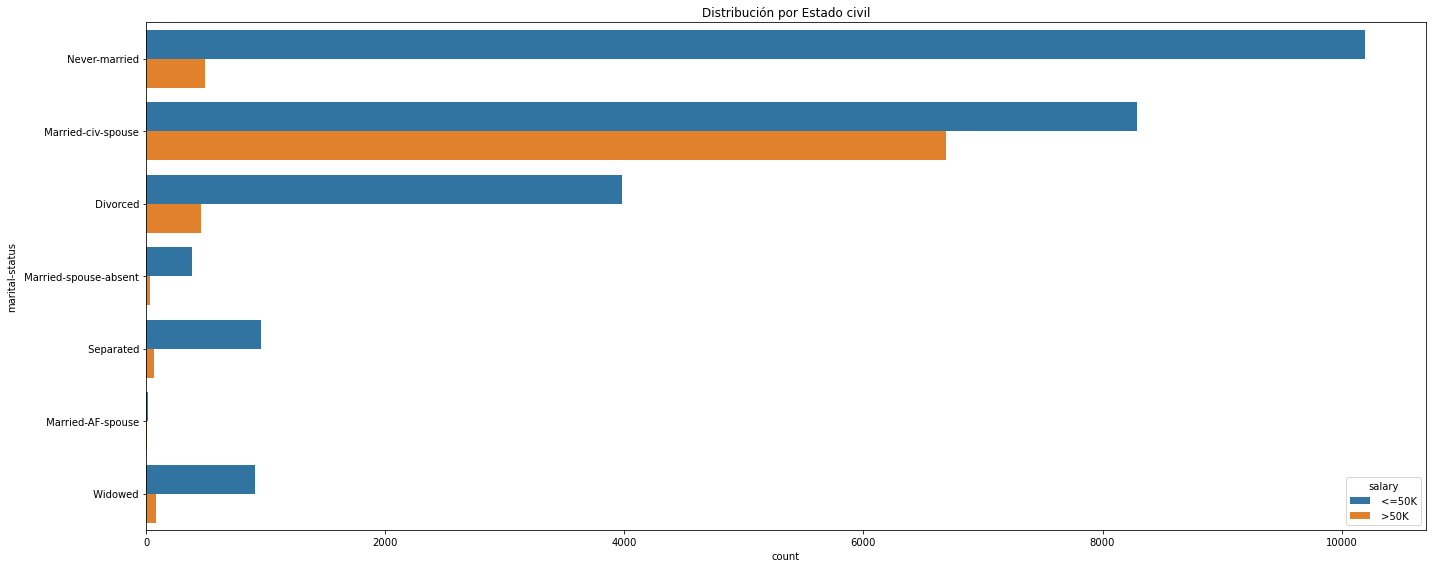

In [16]:
fig = plt.figure(figsize =  (20,8))
sns.countplot(y='marital-status', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Estado civil")
plt.tight_layout()

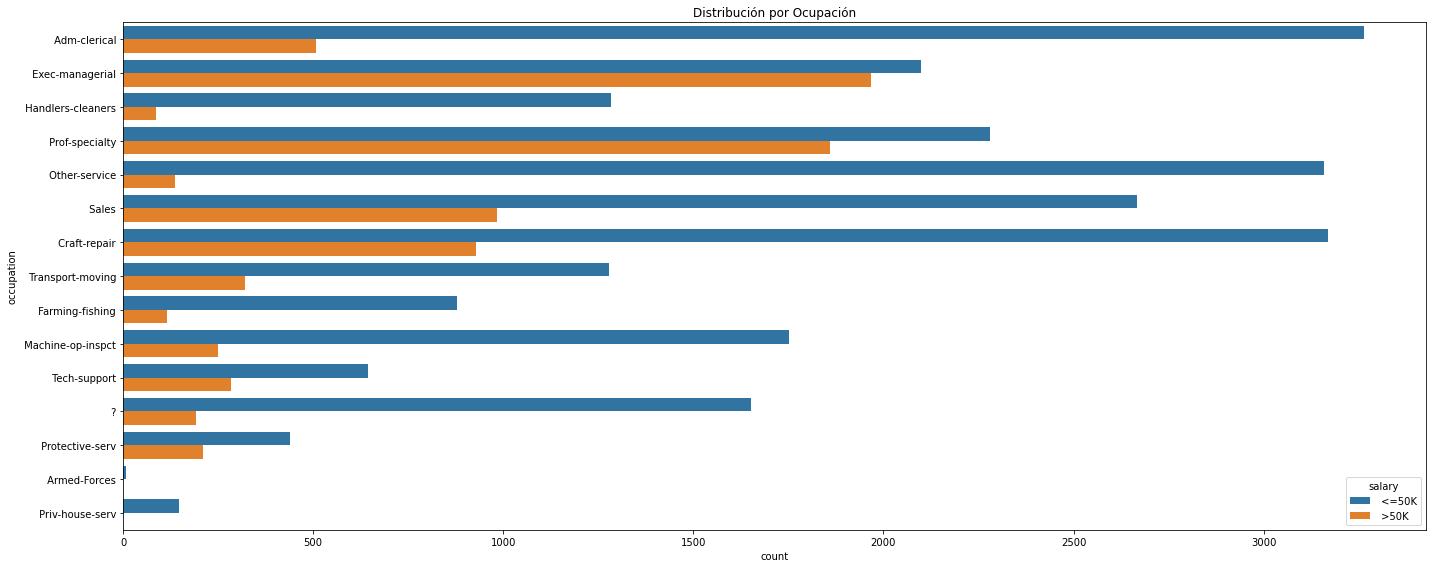

In [17]:
fig = plt.figure(figsize =  (20,8))
sns.countplot(y='occupation', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Ocupación")
plt.tight_layout()

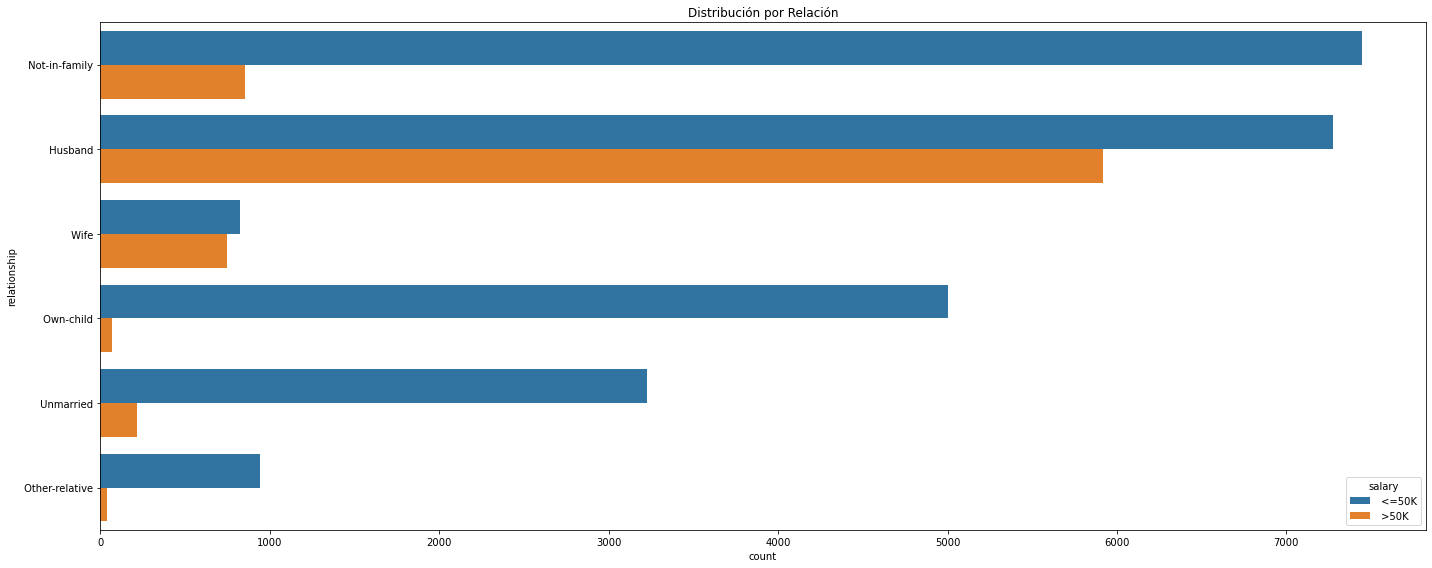

In [18]:
fig = plt.figure(figsize =  (20,8))
sns.countplot(y='relationship', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Relación")
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

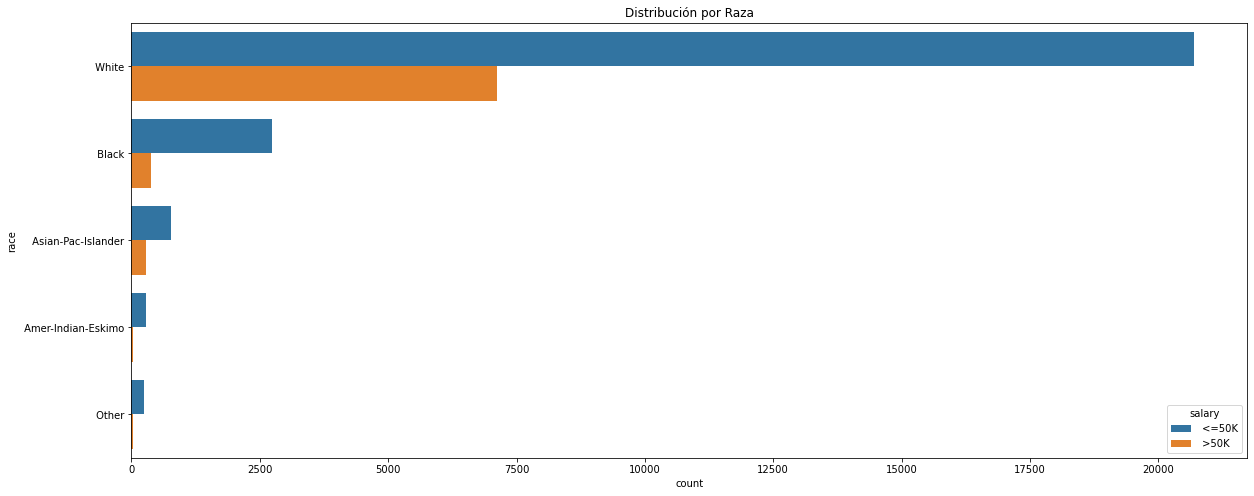

In [19]:
fig = plt.figure(figsize =  (20,8))
sns.countplot(y='race', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Raza")
plt.show
#plt.tight_layout()

En el grafico parece que est acaracteristica podría ser útil en nuestro modelo de predicción, ya que los blancos, negros y asiáticos tienen un porcentaje mayor de entradas superiores a 50.000 dólares que el resto de razas. Sin embargo, el tamaño de la muestra de blancos en el conjunto de datos es desproporcionadamente grande en comparación con todas las demás razas. El segundo grupo más representado son los negros con menos de 5000 entradas. **La falta de distribución equitativa hizo que se considerára no utilizar este atributo en elmodelo de predicción.**

Text(0.5, 1.0, 'Distribución por Sexo')

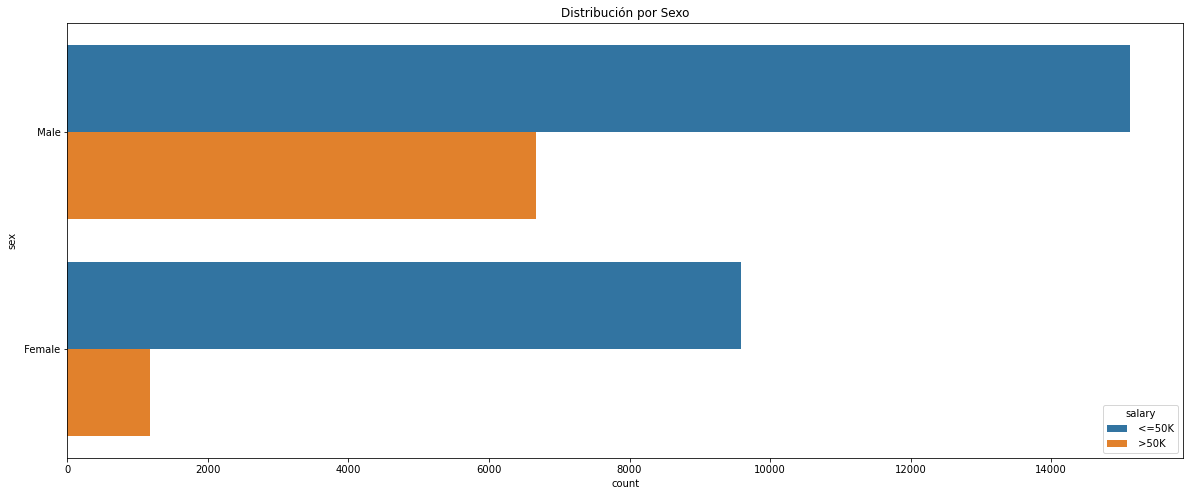

In [20]:
fig = plt.figure(figsize =  (20,8))
sns.countplot(y='sex', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Sexo")
#plt.tight_layout()

Se puede ver que hay casi el doble del tamaño de la muestra de hombres en comparación con las mujeres en el conjunto de datos. Si bien esto puede no afectar demasiado nuestras predicciones, la distribución del ingreso sí puede hacerlo. Como se aprecia el porcentaje de hombres que ganan más de $ 50,000 es mucho mayor que el porcentaje de mujeres que ganan la misma cantidad. **Este será sin duda un factor significativo y debería ser una característica considerada en nuestro modelo de predicción.**

Text(0.5, 1.0, 'Distribución por Ciudad natal')

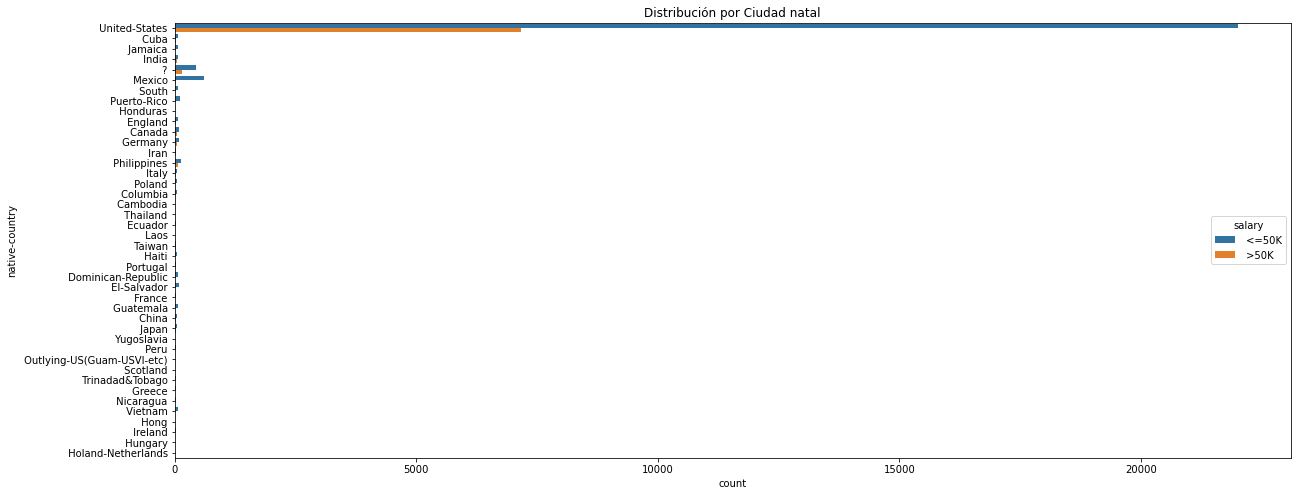

In [21]:
fig = plt.figure(figsize =  (20,8))
sns.countplot(y='native-country', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Ciudad natal")
#plt.tight_layout()

Text(0.5, 1.0, 'Distribución por horas por semana')

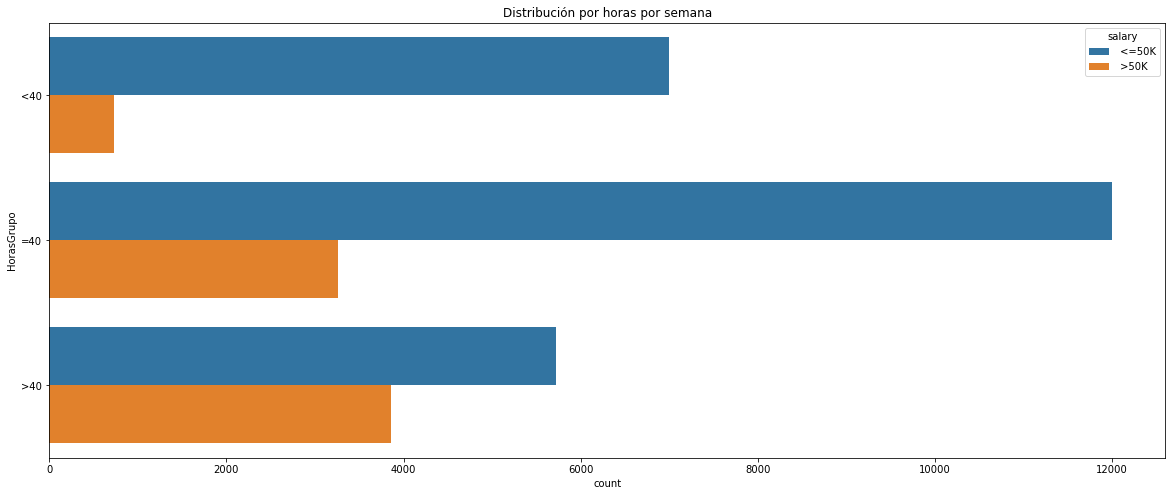

In [22]:
fig = plt.figure(figsize =  (20,8))
bins= [0,39,41,110]
labels = ['<40','=40','>40']
dataset_mat['HorasGrupo'] = pd.cut(dataset_mat['hours-per-week'], bins=bins, labels=labels, right=False)
#print (dataset_mat)
sns.countplot(y='HorasGrupo', hue = 'salary', data = dataset_mat)
plt.title("Distribución por horas por semana")
#plt.tight_layout()

Al observar la distribución del grafico, la gran mayoría de las personas trabajan 40 horas a la semana. Independientemente de la distribución no uniforme, ademas se muestra que el porcentaje de personas que ganan más de $ 50 000 es similar entre los individuos que trabajan 40 horas o más. SIn embargo al trabajar menor de 40 horas disminuye drásticamente en las personas que ganan más de 50 mil.



**Eliminación de funciones**
También se opto por no utilizar las caracteristicas: "fnlwgt", "relationship" y "capital Gains/Loss". Estas características no parecenn útiles para el análisis o tenían demasiados datos incorrectos, es decir, valores cero, valores desconocidos / privados.

# Llena los valores malos y pérdidos

In [23]:
dataset_mat.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
HorasGrupo        0
dtype: int64

In [24]:
# Cuenta los valores extraños en las columnas
for col in dataset_mat.columns:
    if dataset_mat[col].dtype == object:
        print(col, dataset_mat[col].str.contains(' \?').sum())
        
# Cuenta los valores extraños en las columnas
for col in dataset_test.columns:
    if dataset_test[col].dtype == object:
        print(col, dataset_test[col].str.contains(' \?').sum())        

workclass 1836
education 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
native-country 583
salary 0
workclass 963
education 0
marital-status 0
occupation 966
relationship 0
race 0
sex 0
native-country 274
salary 0


In [25]:
# Define una variable con las columnas con valores extraños
columns_with_na_vals = ['workclass', 'occupation', 'native-country']

In [26]:
# Reemplazar los valores extraños
for col in columns_with_na_vals:
    dataset_mat[col] = (dataset_mat[col].replace(to_replace = ' ?', value = np.nan))
    
for col in columns_with_na_vals:
    dataset_test[col] = (dataset_test[col].replace(to_replace = ' ?', value = np.nan))    
    
# Corrobora la no existencia de valores extraños
for col in dataset_mat.columns:
    if dataset_mat[col].dtype == object:
        print(col, dataset_mat[col].str.contains(' \?').sum())
        
for col in dataset_test.columns:
    if dataset_test[col].dtype == object:
        print(col, dataset_test[col].str.contains(' \?').sum())  

workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
salary 0
workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
salary 0


In [27]:
# Borra valor impropios
dataset_mat = dataset_mat.dropna()
dataset_test = dataset_test.dropna

In [28]:
dataset_mat_stats_df = dataset_mat.describe().T
# Calculamos la asimetría
skew_values = list()
for num_col in dataset_mat_stats_df.index:
    num_col_skew = stats.skew(dataset_mat[num_col])
    skew_values.append(num_col_skew)
dataset_mat_stats_df['skew'] = skew_values
dataset_mat_stats_df


,count,mean,std,min,25%,50%,75%,max,skew
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0,0.530201
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0,1.459147
education-num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0,-0.305363
capital-gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0,11.902090
capital-loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0,4.526155
hours-per-week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0,0.330853


In [75]:
# Descripcion estadística de los datos
dataset_mat.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Graficamos las distribuciones de las features numéricas no categóricas

D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

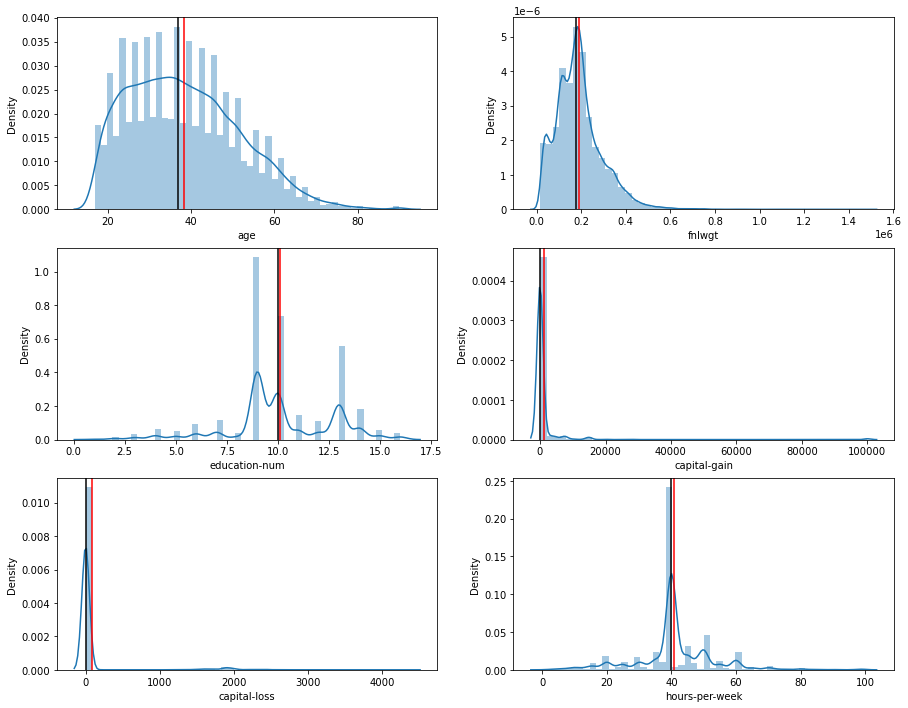

In [76]:
# Histograma para representar la evolución de las variables
fig = plt.figure(figsize=(15,12))

for i, num_col in enumerate(dataset_mat_stats_df.index):
    fig.add_subplot(3,2,1+i)
    sns.distplot(x=dataset_mat[num_col])
    
    mean_value = dataset_mat[num_col].mean()  # Media
    plt.axvline(mean_value, c='red')
    
    median_value = dataset_mat[num_col].median() # Mediana
    plt.axvline(median_value, c='black')

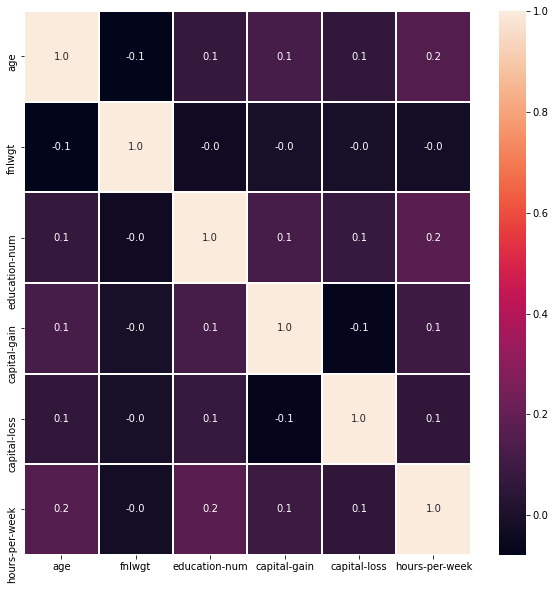

In [77]:
# Correlación entre variables no categoricas
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset_mat.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
sns.heatmap(dataset_test.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

In [78]:
list_mult_not_ord = ['workclass', 'education', 'marital-status', 'occupation',
                    'sex','native-country'] #Lista de variable categoricas o ordinales
#list_cat_not_ord = list_binary + list_mult_not_ord 

In [79]:
# Encoding numerico de las variables para trabajar en el modelo
# Hay que transformar a numéricas las variables categóricas para poder trabajar con ellas
# Las variables que aparecen como texto aparecen como object
#dataset_mat.info() #displiega informacion de la columnas dle dataframe
# copiamos en un sub-dataframe los registros cuyo tipo = object
obj_df = dataset_mat.select_dtypes(include=['object']).copy()
#print (obj_df.columns) # despliega las columnas creado en la línea anterior.

from sklearn.preprocessing import LabelEncoder # Esta libreria con proprocessing permite expresar los valores texto en numeros
lb_encoder = LabelEncoder() # creamos un objeto que hará el encoding

# Iterar por las columnas del dataframe
for col in obj_df.columns:
    dataset_mat[col] = lb_encoder.fit_transform(dataset_mat[col]) 
# Sustituimos en el dataframe origimal el valor de texto
# por el valor numerico con fit_transform

# Lo hacemos para el grupo de test
obj_test = dataset_test.select_dtypes(include=['object']).copy()

for col in obj_test.columns:
    dataset_test[col] = lb_encoder.fit_transform(dataset_test[col]) 

#dataset_mat.head()
#dataset_mat.isnull().sum() #Permite chequear si hay alguna variable con nulos.
#dataset_test.isnull().sum() #Permite chequear si hay alguna variable con nulos.

AttributeError: 'function' object has no attribute 'select_dtypes'

In [ ]:
# Correlación entre todas las variables
f,ax = plt.subplots(figsize=(10,10))
# Train
sns.heatmap(dataset_mat.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
#plt.subplot(2, 2, 1) 
plt.title("Datos de entrenamiento") 
plt.show()

f,ax = plt.subplots(figsize=(10,10))
# Test
#plt.subplot(2, 2, 2) 
sns.heatmap(dataset_test.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.title("Datos de Test") 
plt.show()

In [1]:
# Boxplots - Visualizar anomalias. Cuartiles, y cuales e salen de los rangos
f, ax = plt.subplots(2, 3, figsize=(14,20))

#Usando "x" daba problema
sns.boxplot(y= "workclass", data=dataset_mat, orient='v' , ax=ax[0][1], palette="Blues") 
sns.boxplot(y= "education", data=dataset_mat, orient='v' , ax=ax[0][0], palette="Purples") 
sns.boxplot(y= "marital-status", data=dataset_mat, orient='v' , ax=ax[0][2], palette=sns.cubehelix_palette(8)) 
sns.boxplot(y= "occupation", data=dataset_mat, orient='v' , ax=ax[1][0], palette="GnBu_d") 
sns.boxplot(y= "native-country", data=dataset_mat, orient='v' , ax=ax[1][1], palette="Purples") 
#Estos graficos me permiten identicar las anomalias, aquellos puntos que quedan fuera del gráfico.

NameError: name 'plt' is not defined

In [81]:
dataset_mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  int32   
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  int32   
 4   education-num   30162 non-null  int64   
 5   marital-status  30162 non-null  int32   
 6   occupation      30162 non-null  int32   
 7   relationship    30162 non-null  int32   
 8   race            30162 non-null  int32   
 9   sex             30162 non-null  int32   
 10  capital-gain    30162 non-null  int64   
 11  capital-loss    30162 non-null  int64   
 12  hours-per-week  30162 non-null  int64   
 13  native-country  30162 non-null  int32   
 14  salary          30162 non-null  int32   
 15  HorasGrupo      30162 non-null  category
dtypes: category(1), int32(9), int64(6)
memory usage: 2.7 MB


# 3. EDA (bivariante)

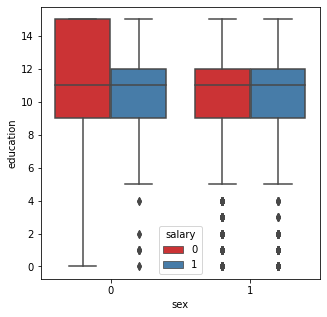

In [82]:
# Boxplot de dos categorias
f,ax = plt.subplots(figsize=(5,5)) 
sns.boxplot(x="sex",y="education", hue="salary",data=dataset_mat, palette="Set1") 
plt.show()

In [83]:
dataset_mat.groupby('education').salary.nunique().reset_index()

,education,salary
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,2
6,6,2
7,7,2
8,8,2
9,9,2


In [84]:
# se importa para evaluar la variables categoricas no ordinales-
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [85]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia education
x = dataset_mat['education']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de educacion en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de educacion en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0157    0.9 -0.0799  0.0486  False
     0      2    0.005    0.9 -0.0808  0.0907  False
     0      3  -0.0322    0.9 -0.1543  0.0898  False
     0      4  -0.0303    0.9 -0.1247  0.0641  False
     0      5  -0.0091    0.9 -0.0848  0.0666  False
     0      6   -0.017    0.9 -0.0976  0.0636  False
     0      7    0.182  0.001  0.1172  0.2468   True
     0      8   0.1912  0.001  0.1298  0.2527   True
     0      9   0.3495  0.001  0.2976  0.4014   True
     0     10   0.6747  0.001  0.5888  0.7606   True
     0     11   0.0924  0.001  0.0423  0.1425   True
     0     12   0.4923  0.001  0.4332  0.5513   True
     0     13   -0.072    0.9  -0.283  0.1391  False
     0     14   0.6771  0.001  0.6008  0.7534   True
     0     15   0.1281  0.001  0.0771  0.1791   True
   

In [86]:
# Cuales pueden influir en el tipo de salario.

# Influencia de tipo de trabajo
x = dataset_mat['workclass']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tipo de trabajo en tipo de salario")
print (Results)

Influencia de tipo de trabajo en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0924  0.001 -0.1419  -0.043   True
     0      2  -0.1683  0.001 -0.2101 -0.1264   True
     0      3   0.1716  0.001  0.1155  0.2277   True
     0      4  -0.1013  0.001 -0.1494 -0.0533   True
     0      5  -0.1181  0.001 -0.1721 -0.0641   True
     0      6  -0.3871 0.0133 -0.7257 -0.0484   True
     1      2  -0.0758  0.001 -0.1048 -0.0469   True
     1      3    0.264  0.001  0.2167  0.3113   True
     1      4  -0.0089    0.9 -0.0463  0.0285  False
     1      5  -0.0257  0.605 -0.0704  0.0191  False
     1      6  -0.2946 0.1332  -0.632  0.0427  False
     2      3   0.3399  0.001  0.3006  0.3792   True
     2      4   0.0669  0.001  0.0404  0.0935   True
     2      5   0.0502  0.001   0.014  0.0863   True
     2      6  -0.2188 0.4696 -0.5551  0.1175  Fal

In [87]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia education
x = dataset_mat['marital-status']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de marital-status en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de marital-status en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.3689  0.001  0.1196  0.6183   True
     0      2   0.3477  0.001  0.3277  0.3677   True
     0      3  -0.0235    0.9 -0.0853  0.0383  False
     0      4  -0.0589  0.001   -0.08 -0.0379   True
     0      5   -0.037 0.1114 -0.0781  0.0042  False
     0      6  -0.0105    0.9 -0.0539  0.0328  False
     1      2  -0.0212    0.9 -0.2701  0.2277  False
     1      3  -0.3924  0.001 -0.6481 -0.1367   True
     1      4  -0.4279  0.001 -0.6768 -0.1789   True
     1      5  -0.4059  0.001 -0.6574 -0.1544   True
     1      6  -0.3795  0.001 -0.6313 -0.1276   True
     2      3  -0.3712  0.001 -0.4312 -0.3111   True
     2      4  -0.4066  0.001 -0.4217 -0.3916   True
     2      5  -0.3847  0.001 -0.4231 -0.3463   True
     2      6  -0.3582  0.001  -0.399 -0.3174   Tru

In [88]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia occupation
x = dataset_mat['occupation']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de occupation en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de occupation en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0227    0.9 -0.4763  0.4308  False
     0      2   0.0915  0.001  0.0606  0.1224   True
     0      3   0.3514  0.001  0.3204  0.3824   True
     0      4  -0.0176    0.9 -0.0662  0.0311  False
     0      5  -0.0724  0.001 -0.1155 -0.0292   True
     0      6  -0.0092    0.9 -0.0471  0.0287  False
     0      7  -0.0927  0.001 -0.1255   -0.06   True
     0      8  -0.1268 0.0171 -0.2427  -0.011   True
     0      9   0.3147  0.001  0.2838  0.3455   True
     0     10   0.1923  0.001  0.1342  0.2503   True
     0     11   0.1368  0.001   0.105  0.1686   True
     0     12    0.171  0.001  0.1208  0.2212   True
     0     13   0.0691  0.001  0.0282    0.11   True
     1      2   0.1142    0.9 -0.3393  0.5677  False
     1      3   0.3741 0.2414 -0.0794  0.8276  False
  

In [89]:
# Cuales pueden influir en el tipo de salario.
# No se va usar
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia relationship
x = dataset_mat['relationship']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de relationship en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de relationship en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.3491  0.001  -0.365 -0.3333   True
     0      2  -0.4163  0.001 -0.4544 -0.3782   True
     0      3  -0.4413  0.001 -0.4605 -0.4222   True
     0      4  -0.3894  0.001 -0.4111 -0.3676   True
     0      5   0.0379 0.0062   0.007  0.0688   True
     1      2  -0.0672  0.001  -0.106 -0.0283   True
     1      3  -0.0922  0.001 -0.1128 -0.0716   True
     1      4  -0.0402  0.001 -0.0633 -0.0172   True
     1      5   0.3871  0.001  0.3552  0.4189   True
     2      3   -0.025 0.4857 -0.0654  0.0153  False
     2      4   0.0269 0.4381 -0.0147  0.0685  False
     2      5   0.4542  0.001  0.4072  0.5013   True
     3      4    0.052  0.001  0.0266  0.0774   True
     3      5   0.4793  0.001  0.4457  0.5128   True
     4      5   0.4273  0.001  0.3922  0.4624   True


In [90]:
# Cuales pueden influir en el tipo de salario.
# No se va a usar
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia race
x = dataset_mat['race']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de race en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de race en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1582  0.001  0.0785  0.2379   True
     0      2    0.011    0.9 -0.0618  0.0839  False
     0      3   -0.028    0.9 -0.1318  0.0759  False
     0      4   0.1448  0.001  0.0751  0.2146   True
     1      2  -0.1472  0.001 -0.1922 -0.1021   True
     1      3  -0.1862  0.001 -0.2728 -0.0996   True
     1      4  -0.0134 0.8863 -0.0533  0.0265  False
     2      3   -0.039 0.6534 -0.1193  0.0413  False
     2      4   0.1338  0.001  0.1105  0.1571   True
     3      4   0.1728  0.001  0.0952  0.2504   True
----------------------------------------------------


# 4. Selección de variables para el modelo

In [91]:
# Las que influyan en el tipo de salario.
# Numericas y categoricas ordinales sin influyen en la calificación final o salida
# Se tomara las multiclase, porque parece  influir.
#'sex',

# seleccionar automaticamente las variables. Se pudo haber hecho manual. #,
list_cat_corrs = ['age','workclass', 'education', 'marital-status', 'occupation',
                   'hours-per-week', 'native-country', 'salary'] 
df_ordinal = dataset_mat[list_cat_corrs].corr()['salary'].reset_index().rename(columns={'index':'variable'})
df_ordinal = df_ordinal[~df_ordinal['variable'].isin(['salary'])] # El rabo de chancho niega, como un not
#df_ordinal = df_ordinal[abs(df_ordinal['salary'])>0.21]  # Variables que tenga correlación significativamente alta > 0.21
df_ordinal
list_ordinal_chosen = list(df_ordinal['variable'].values)
list_ordinal_chosen

['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'hours-per-week',
 'native-country']

In [92]:
# seleccionar las variables binarias
df_binary = pd.DataFrame()
list_binary = ['sex']

# Se itera pr las columnas, obteniendo el contraste de hipotesis con salary y solo nos quedaremos con aquellas que rechacen la 
# hipotesis nula. Que este debajo del umbral Threshold

threshold = 0.05

for column in list_binary:
    pvalue = stats.f_oneway(dataset_mat[dataset_mat[column]==0]["salary"],
                           dataset_mat[dataset_mat[column]==1]["salary"])[1] #Segunda posición de la lista el pvalue
    
    df_binary = df_binary.append(pd.DataFrame({'variable':[column],
                                              'pvalue':[pvalue]}))
    
df_binary = df_binary[df_binary['pvalue']<=threshold]
list_binary_chosen = list(df_binary['variable'].values)
    
df_binary
list_binary_chosen

['sex']

In [93]:
list_all_chosen = list_ordinal_chosen + list_binary_chosen 
list_all_chosen

['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'hours-per-week',
 'native-country',
 'sex']

# 5. Construcción del modelo

In [30]:
df_mat = dataset_mat[list_all_chosen + ['salary']] # salary es la variable de salida.. A predecir
#df_mat.head()
df_test = dataset_test[list_all_chosen + ['salary']] # salary es la variable de salida.. A predecir
#df_test.head()

NameError: name 'list_all_chosen' is not defined

In [29]:
# onehot encoding, para representar los variables categoricaas. La categoria maxima se representa con max-1 ceros
# Recuerden que son max categorias. con la combinación de un 1 en la posición, se le da al valor.
aux = pd.get_dummies(df_mat['workclass'], drop_first = True) #
aux.columns = ['workclass_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['workclass']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['education'], drop_first = True) #
aux.columns = ['education_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['education']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['marital-status'], drop_first = True) #
aux.columns = ['marital-status_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['marital-status']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['occupation'], drop_first = True) #
aux.columns = ['occupation_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['occupation']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['native-country'], drop_first = True) #
aux.columns = ['native-country_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['native-country']) # Se descarta la columna original
#df_mat.head()

aux = pd.get_dummies(df_test['workclass'], drop_first = True) #
aux.columns = ['workclass_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['workclass']) # Se descarta la columna original
aux = pd.get_dummies(df_test['education'], drop_first = True) #
aux.columns = ['education_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['education']) # Se descarta la columna original
aux = pd.get_dummies(df_test['marital-status'], drop_first = True) #
aux.columns = ['marital-status_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['marital-status']) # Se descarta la columna original
aux = pd.get_dummies(df_test['occupation'], drop_first = True) #
aux.columns = ['occupation_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['occupation']) # Se descarta la columna original
aux = pd.get_dummies(df_test['native-country'], drop_first = True) #
aux.columns = ['native-country_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['native-country']) # Se descarta la columna original
#df_mat.head()

NameError: name 'df_mat' is not defined

In [96]:
list_ordinal_chosen

['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'hours-per-week',
 'native-country']

In [97]:
# Normalizado o Escalado de las variables numerales ordinales, las pone en valores entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

list_ordinal = ['age','hours-per-week']
scaler = MinMaxScaler()
df_mat[list_ordinal] = scaler.fit_transform(df_mat[list_ordinal]) # devuelve los valores transformados
df_mat.head()

#df_test[list_ordinal] = scaler.fit_transform(df_test[list_ordinal]) # devuelve los valores transformados
#df_test.head()

,age,hours-per-week,sex,salary,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
0,0.301370,0.397959,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.122449,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.397959,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.397959,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.397959,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Separacion en variables entrada/salida
X = df_mat.drop(columns=["salary"]).values
y = df_mat["salary"].values
#Xt = df_test.drop(columns=["salary"]).values
#yt = df_test["salary"].values

In [99]:
# Train/Test Split
# Con los datos del archivo de prueba
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(Xt,yt) 

# Con datos de prueba del archivo de train aleatorios
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [100]:
#SVM (Kernel = rbf)
from sklearn.svm import SVC
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Filtered
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[6924  627]
 [1118 1385]]
precision: 0.6883697813121272  recall: 0.5533359968038354  f1: 0.6135105204872646


# Fin de ejercicio

In [101]:
print(y_pred)

[0 0 0 ... 0 1 1]


In [102]:
performance = []

In [103]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [104]:
# Binary data
GNB.fit(X_train,y_train)
train_score = GNB.score(X_train,y_train)
test_score = GNB.score(X_test,y_test)
print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Gaussian Naive Bayes', 'training_score':train_score, 'testing_score':test_score})

Gaussian Naive Bayes : Training score - 0.3486174656852994 - Test score - 0.34563357867515415


In [105]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

logClassifier = LogisticRegression()

In [106]:
logClassifier.fit(X_train,y_train)
train_score = logClassifier.score(X_train,y_train)
test_score = logClassifier.score(X_test,y_test)

print(f'LogisticRegression : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'LogisticRegression', 'training_score':train_score, 'testing_score':test_score})

LogisticRegression : Training score - 0.831857966978317 - Test score - 0.8261388502088721


D:\Personal\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn_scores = []

KNN : Training score - 0.9641933558782574 -- Test score - 0.7771036403421524
KNN : Training score - 0.8879053113188781 -- Test score - 0.8016709767256813
KNN : Training score - 0.8697533320071613 -- Test score - 0.8139049134672767
KNN : Training score - 0.8582653670181023 -- Test score - 0.8169882633777601
KNN : Training score - 0.8541873881042371 -- Test score - 0.8214640938929779
KNN : Training score - 0.8515516212452755 -- Test score - 0.8191764471851999
KNN : Training score - 0.8493137059876666 -- Test score - 0.820966779391287
KNN : Training score - 0.8473244479809031 -- Test score - 0.8216630196936543
KNN : Training score - 0.844987069822956 -- Test score - 0.8222597970956833
KNN : Training score - 0.8433956634175452 -- Test score - 0.8238512035010941


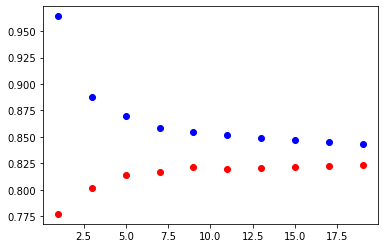

In [109]:
train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

In [110]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

knn.score(X_train,y_train)

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})

K Neighbors : Training score - 0.8697533320071613 - Test score - 0.8139049134672767


In [111]:
performance

[{'algorithm': 'Gaussian Naive Bayes',
  'training_score': 0.3486174656852994,
  'testing_score': 0.34563357867515415},
 {'algorithm': 'LogisticRegression',
  'training_score': 0.831857966978317,
  'testing_score': 0.8261388502088721},
 {'algorithm': 'K Neighbors',
  'training_score': 0.8697533320071613,
  'testing_score': 0.8139049134672767}]

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rndTree = RandomForestClassifier()

In [114]:
rndTree.fit(X_train,y_train)

RandomForestClassifier()

In [115]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [116]:
train_score = rndTree.score(X_train,y_train)
test_score = rndTree.score(X_test,y_test)

print(f'Random Forests : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Random Forests', 'training_score':train_score, 'testing_score':test_score})

Random Forests : Training score - 0.9684205291426298 - Test score - 0.8035607718321066
